# KNN Classifier

## Step 1: Data Preprocessing & Exploration.

In [3]:
import pandas as pd
data=pd.read_csv('Downloads/Movie_classification.csv')
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
data.shape

(506, 19)

In [5]:
data.columns

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       '3D_available', 'Time_taken', 'Twitter_hastags', 'Genre',
       'Avg_age_actors', 'Num_multiplex', 'Collection', 'Start_Tech_Oscar'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [7]:
data.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510,0.545455
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764,0.498422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000,1.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000


In [8]:
data.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [10]:
data['Time_taken'].mean()

157.39149797570855

In [11]:
data['Time_taken'].fillna('157',inplace=True)

In [12]:
data['Time_taken'].isnull().sum()

0

## Step 2: Data Visualization

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='Marketing expense'>

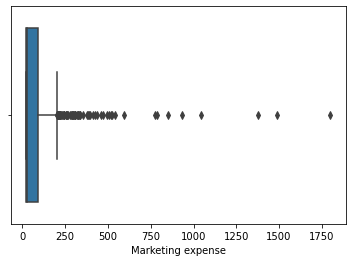

In [15]:
sns.boxplot(x=data['Marketing expense'])

<AxesSubplot:xlabel='Production expense'>

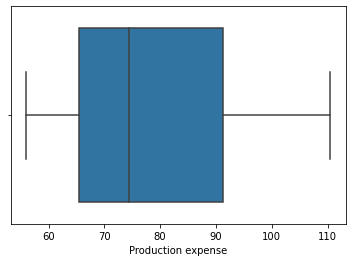

In [16]:
sns.boxplot(x=data['Production expense'])

<AxesSubplot:xlabel='Multiplex coverage'>

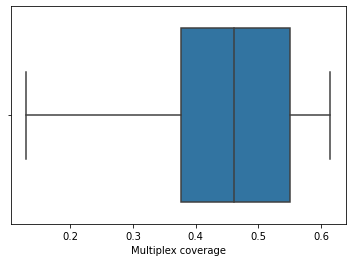

In [17]:
sns.boxplot(x=data['Multiplex coverage'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


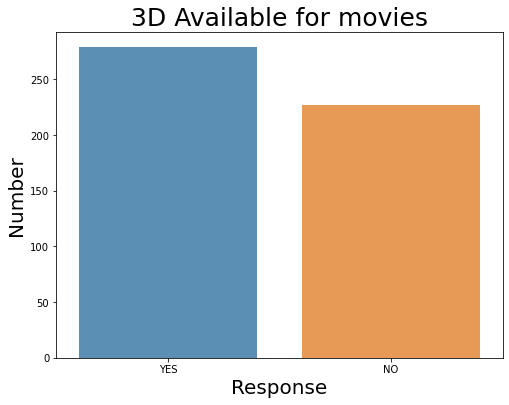

In [18]:
count=data['3D_available'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("3D Available for movies", fontsize=25)
plt.ylabel('Number', fontsize=20)
plt.xlabel("Response", fontsize=20)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


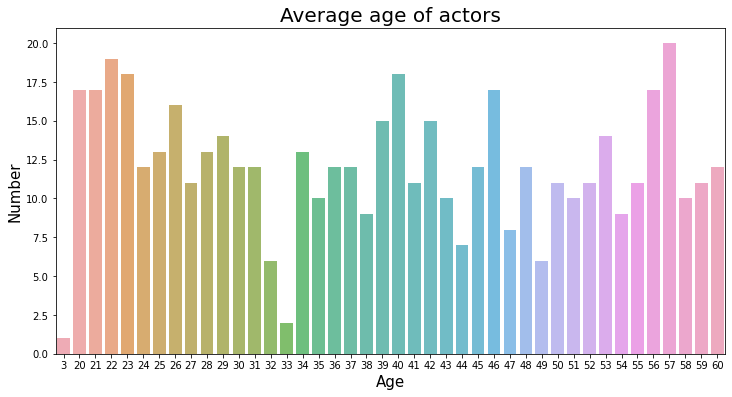

In [19]:
count=data['Avg_age_actors'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Average age of actors", fontsize=20)
plt.ylabel('Number', fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


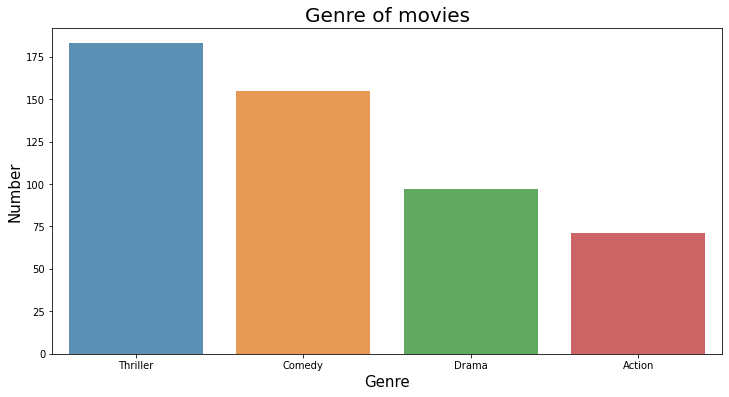

In [20]:
count=data['Genre'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Genre of movies", fontsize=20)
plt.ylabel('Number', fontsize=15)
plt.xlabel("Genre", fontsize=15)
plt.show()

In [21]:
data=data.drop(['3D_available','Time_taken','Genre'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Twitter_hastags      506 non-null    float64
 12  Avg_age_actors       506 non-null    int64  
 13  Num_multiplex        506 non-null    int64  
 14  Collection           506 non-null    int64  
 15  Start_Tech_Oscar     506 non-null    int

In [22]:
data=data.astype(int)
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20,59,0,36524,138,7,8,7,7,7,527367,223,23,494,48000,1
1,20,69,0,35668,152,7,7,7,7,7,494055,243,42,462,43200,0
2,20,69,0,39912,134,7,7,7,7,7,547051,2022,38,458,69400,1
3,20,59,0,38873,119,6,7,6,7,8,516279,225,45,472,66800,1
4,21,59,0,39701,127,6,7,6,7,8,531448,225,55,395,72400,1


## Data Training & Model Creation

In [23]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, x is the data which will have features for classification and y will have our target.
x=data.drop(['Start_Tech_Oscar'],axis=1)
y=data['Start_Tech_Oscar']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
clfr=KNeighborsClassifier(n_neighbors=3)
clfr.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
pred= clfr.predict(x_test)

## Performance Evaluation

In [46]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t    RootMeanSquareError   \t\t   Accuracy of the model") 
print("""KNN                      \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred)), clfr.score(x_train,y_train)))


Model			    RootMeanSquareError   		   Accuracy of the model
KNN                      		 0.6716 	 		 0.7896
